<a href="https://colab.research.google.com/github/anandkgupt/Machine-Learning-Lab/blob/main/Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

**Theoretical Q&A**

1. What is Logistic Regression, and how does it differ from Linear Regression?

Logistic Regression is used for classification problems, predicting probabilities using a sigmoid function, while Linear Regression is used for predicting continuous values.
2. What is the mathematical equation of Logistic Regression?

P(Y=1∣X)=11+e−(β0+β1X1+…+βnXn)P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \ldots + \beta_n X_n)}}P(Y=1∣X)=1+e−(β0+β1X1+…+βnXn)1
3. Why do we use the Sigmoid function in Logistic Regression?

It maps predictions to probabilities between 0 and 1, making it suitable for binary classification.
4. What is the cost function of Logistic Regression?

The log loss or binary cross-entropy:
J(θ)=−1m∑[ylog⁡(y^)+(1−y)log⁡(1−y^)]J(\theta) = -\frac{1}{m} \sum [y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]J(θ)=−m1∑[ylog(y^)+(1−y)log(1−y^)]
5. What is Regularization in Logistic Regression? Why is it needed?

Regularization penalizes large coefficients to reduce overfitting. It helps the model generalize better.
6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

•	Ridge (L2): Penalizes squared magnitude of coefficients.
•	Lasso (L1): Penalizes absolute value of coefficients (can shrink some to zero).
•	Elastic Net: Combination of L1 and L2 penalties.
7. When should we use Elastic Net instead of Lasso or Ridge?

When features are highly correlated and you want both variable selection and regularization.
8. What is the impact of the regularization parameter (λ) in Logistic Regression?

Higher λ → more penalty → smaller coefficients → less overfitting (but risk underfitting).
9. What are the key assumptions of Logistic Regression?

•	Linearity in the log-odds
•	Independence of errors
•	No multicollinearity
•	Large sample size
10. What are some alternatives to Logistic Regression for classification tasks?

•	Decision Trees
•	Random Forests
•	SVM
•	Naive Bayes
•	Neural Networks
11. What are Classification Evaluation Metrics?

•	Accuracy
•	Precision
•	Recall
•	F1 Score
•	ROC-AUC
•	Log Loss
12. How does class imbalance affect Logistic Regression?

It can bias predictions toward the majority class; performance on minority class degrades.
13. What is Hyperparameter Tuning in Logistic Regression?

Adjusting settings like regularization strength (C or λ), solver type, and penalty to optimize performance.
14. What are different solvers in Logistic Regression? Which one should be used?

•	liblinear: good for small datasets, L1 and L2
•	saga: scalable, supports L1, L2, Elastic Net
•	lbfgs: good for L2, faster on large datasets
Choose based on dataset size and regularization needs.
15. How is Logistic Regression extended for multiclass classification?

Using One-vs-Rest (OvR) or Softmax (Multinomial Logistic Regression).
16. What are the advantages and disadvantages of Logistic Regression?

Advantages: Simple, interpretable, efficient
Disadvantages: Assumes linearity, sensitive to outliers, poor with non-linear patterns
17. What are some use cases of Logistic Regression?

•	Medical diagnosis (e.g., cancer detection)
•	Credit scoring
•	Spam detection
•	Customer churn prediction
18. What is the difference between Softmax Regression and Logistic Regression?

Softmax handles multi-class classification by generalizing logistic regression beyond binary.
19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

•	OvR: Simpler, faster
•	Softmax: Better when classes are mutually exclusive and balanced
20. How do we interpret coefficients in Logistic Regression?

Coefficients represent the log-odds change in the outcome for a one-unit increase in the predictor.





**Practical**

In [1]:
#1 Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Logistic Regression model
model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.956140350877193

In [2]:
#2 Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy
from sklearn.linear_model import LogisticRegression

# Create and train Logistic Regression model with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
model_l1.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l1


0.956140350877193

In [3]:
#3 Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients
# Train Logistic Regression model with L2 regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
model_l2.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

# Get model coefficients
coefficients_l2 = model_l2.coef_

accuracy_l2, coefficients_l2


(0.956140350877193,
 array([[ 2.13248406e+00,  1.52771940e-01, -1.45091255e-01,
         -8.28669349e-04, -1.42636015e-01, -4.15568847e-01,
         -6.51940282e-01, -3.44456106e-01, -2.07613380e-01,
         -2.97739324e-02, -5.00338038e-02,  1.44298427e+00,
         -3.03857384e-01, -7.25692126e-02, -1.61591524e-02,
         -1.90655332e-03, -4.48855442e-02, -3.77188737e-02,
         -4.17516190e-02,  5.61347410e-03,  1.23214996e+00,
         -4.04581097e-01, -3.62091502e-02, -2.70867580e-02,
         -2.62630530e-01, -1.20898539e+00, -1.61796947e+00,
         -6.15250835e-01, -7.42763610e-01, -1.16960181e-01]]))

In [4]:
#4 Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model with Elastic Net regularization
model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Define hyperparameters for tuning
param_grid = {
    'l1_ratio': [0.1, 0.5, 0.9],  # Mix between L1 and L2
    'C': [0.1, 1.0, 10.0]         # Inverse of regularization strength
}

# Use GridSearchCV to find the best combination
grid = GridSearchCV(model_elasticnet, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Predict and calculate accuracy with the best model
best_model = grid.best_estimator_
y_pred_elasticnet = best_model.predict(X_test)
accuracy_elasticnet = accuracy_score(y_test, y_pred_elasticnet)

accuracy_elasticnet, best_model.coef_, best_model.get_params()['l1_ratio'], best_model.get_params()['C']


(0.9736842105263158,
 array([[ 1.52252898e-02, -8.54164204e-04,  7.65011975e-02,
          1.44159864e-02,  0.00000000e+00, -1.73282189e-04,
         -4.96593438e-04, -2.19075278e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  3.11822915e-04,
         -1.25050121e-03, -2.26548422e-02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.58787690e-02,
         -8.81445799e-03,  6.30100636e-02, -2.72115485e-02,
          0.00000000e+00, -1.39242811e-03, -1.95129098e-03,
         -2.79456752e-04, -2.54110897e-05,  0.00000000e+00]]),
 0.1,
 0.1)

In [5]:
#5 Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset (multiclass)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with One-vs-Rest strategy
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=10000)
model_ovr.fit(X_train_mc, y_train_mc)

# Predict and evaluate
y_pred_mc = model_ovr.predict(X_test_mc)
accuracy_mc = accuracy_score(y_test_mc, y_pred_mc)

accuracy_mc


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


1.0

In [6]:
#6 Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy
# Define the parameter grid for C and penalty
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2 penalties
}

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Use GridSearchCV to tune hyperparameters
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Evaluate the best model
best_model_lr = grid_search_lr.best_estimator_
y_pred_best = best_model_lr.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_params = grid_search_lr.best_params_

best_params, best_accuracy


({'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}, 0.956140350877193)

In [7]:
#7  Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the Logistic Regression model
model_cv = LogisticRegression(max_iter=10000, solver='liblinear')

# Set up Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
cv_scores = cross_val_score(model_cv, X, y, cv=skf, scoring='accuracy')

# Calculate average accuracy
average_accuracy = cv_scores.mean()

average_accuracy


np.float64(0.96)

In [8]:
#8 Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset from CSV file
df = pd.read_csv('your_dataset.csv')  # Replace with your actual file path

# Separate features and target
X = df.drop('target_column', axis=1)  # Replace 'target_column' with the actual target column name
y = df['target_column']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [9]:
#9 Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # solvers that support both l1 and l2
}

# Initialize the Logistic Regression model
logreg_random = LogisticRegression(max_iter=10000)

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(logreg_random, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Evaluate the best model
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
best_random_accuracy = accuracy_score(y_test, y_pred_random)
best_random_params = random_search.best_params_

best_random_params, best_random_accuracy


({'solver': 'liblinear', 'penalty': 'l1', 'C': 100}, 0.9824561403508771)

In [10]:
#10 Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
from sklearn.multiclass import OneVsOneClassifier

# Use OneVsOne strategy for multiclass logistic regression
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=10000, solver='liblinear'))
ovo_model.fit(X_train_mc, y_train_mc)

# Predict and evaluate
y_pred_ovo = ovo_model.predict(X_test_mc)
accuracy_ovo = accuracy_score(y_test_mc, y_pred_ovo)

accuracy_ovo


1.0

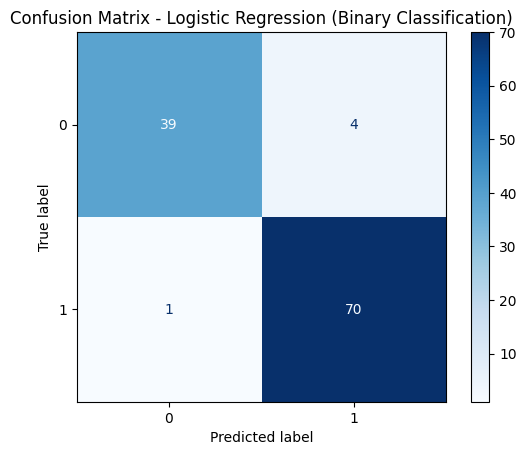

In [11]:
#11 Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Train Logistic Regression model (binary classification assumed)
logreg_binary = LogisticRegression(max_iter=10000, solver='liblinear')
logreg_binary.fit(X_train, y_train)
y_pred_binary = logreg_binary.predict(X_test)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (Binary Classification)")
plt.show()


In [12]:
#12 Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

# Train Logistic Regression model
logreg_eval = LogisticRegression(max_iter=10000, solver='liblinear')
logreg_eval.fit(X_train, y_train)

# Predict on test data
y_pred_eval = logreg_eval.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred_eval, average='binary')
recall = recall_score(y_test, y_pred_eval, average='binary')
f1 = f1_score(y_test, y_pred_eval, average='binary')

precision, recall, f1


(0.9459459459459459, 0.9859154929577465, 0.9655172413793104)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       179
           1       0.47      0.81      0.60        21

    accuracy                           0.89       200
   macro avg       0.72      0.85      0.76       200
weighted avg       0.92      0.89      0.90       200



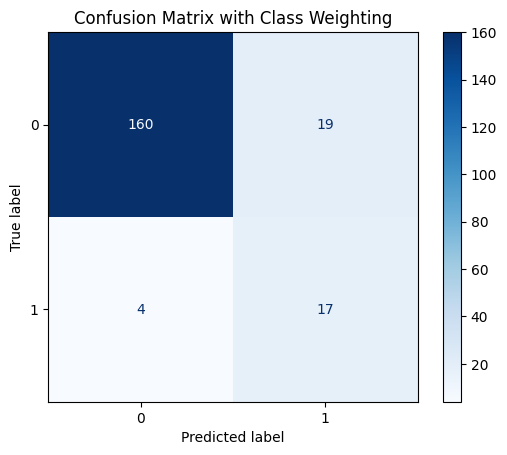

In [13]:
#13 Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)

# Step 5: Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix with Class Weighting")
plt.show()


In [14]:
#14 Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Step 1: Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 2: Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']])
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])

# Step 4: Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Step 5: Split data into features and target
X = df[features]
y = df['Survived']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


ValueError: 2

In [15]:
#15 Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Step 1: Load dataset (Titanic)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 2: Select and preprocess features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Features and target
X = df[features]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model WITHOUT Scaling
model_no_scaling = LogisticRegression(max_iter=1000)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

### Model WITH Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

### Print Results
print(f"Accuracy WITHOUT Scaling: {acc_no_scaling:.4f}")
print(f"Accuracy WITH Scaling   : {acc_scaled:.4f}")


ValueError: 2

In [16]:
#16 Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 2: Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Step 3: Handle missing values
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])

# Step 4: Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Step 5: Split data into features and target
X = df[features]
y = df['Survived']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Step 9: Evaluate ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 10: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


ValueError: 2

In [17]:
#17 Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Feature matrix and target variable
X = df[features]
y = df['Survived']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with custom C value (C=0.5)
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with C=0.5: {accuracy:.4f}")


ValueError: 2

In [18]:
#18 Write a Python program to train Logistic Regression and identify important features based on model coefficients
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Feature matrix and target variable
X = df[features]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature importance (absolute value of coefficients)
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

# Print feature importance
print("Feature Importance (Logistic Regression Coefficients):")
print(importance)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


ValueError: 2

In [19]:
#19 Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Define feature matrix and target variable
X = df[features]
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


ValueError: 2

In [20]:
#20 Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset (Titanic for binary classification)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Define features and target
X = df[features]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get probability scores
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', linewidth=2, label=f'AP = {avg_precision:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: 2

In [21]:
#21 Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load dataset (Titanic for binary classification)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Split into features and target
X = df[features]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

# Train and evaluate model with each solver
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[solver] = acc
    except Exception as e:
        results[solver] = f"Error: {e}"

# Display results
print("Solver Accuracy Comparison:")
for solver, acc in results.items():
    print(f"{solver}: {acc}")


ValueError: 2

In [22]:
#22 Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import matthews_corrcoef

# Load dataset (Titanic for binary classification)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Define features and target
X = df[features]
y = df['Survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate using Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", round(mcc, 4))


ValueError: 2

In [23]:
#23 Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load dataset (Titanic)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Define X and y
X = df[features]
y = df['Survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# 2. Logistic Regression on standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare Accuracies
print("Accuracy on Raw Data:        ", round(acc_raw, 4))
print("Accuracy on Standardized Data:", round(acc_scaled, 4))


ValueError: 2

In [24]:
#24 Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Feature matrix and target variable
X = df[features]
y = df['Survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define parameter grid for C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Perform GridSearchCV
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameter and accuracy
best_C = grid.best_params_['C']
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Regularization Strength (C):", best_C)
print("Test Set Accuracy with Best C:   ", round(test_accuracy, 4))


ValueError: 2

In [25]:
#25  Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Feature matrix and target variable
X = df[features]
y = df['Survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'logistic_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Load model and scaler
loaded_model = joblib.load('logistic_model.joblib')
loaded_scaler = joblib.load('scaler.joblib')

# Make predictions
X_new = loaded_scaler.transform(X_test)
y_pred = loaded_model.predict(X_new)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy after Loading:", round(accuracy, 4))


Model Accuracy after Loading: 0.4134


<ipython-input-25-2c8b3df8feb2>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-25-2c8b3df8feb2>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 